## Architecture

In [6]:
import pathlib

import graphviz
import IPython
import re


@IPython.core.magic.register_line_cell_magic
def dot(line, cell=None):
    src = graphviz.Source(pathlib.Path(line).read_text() if line else cell)._repr_svg_()
    src = re.sub(r'<svg (.*)viewBox', '<svg viewBox', src, flags=re.M | re.DOTALL)
    return IPython.display.SVG(data=src)

### As-Is

These are how we _think_ everything works in the current `master` branch.

#### Front End

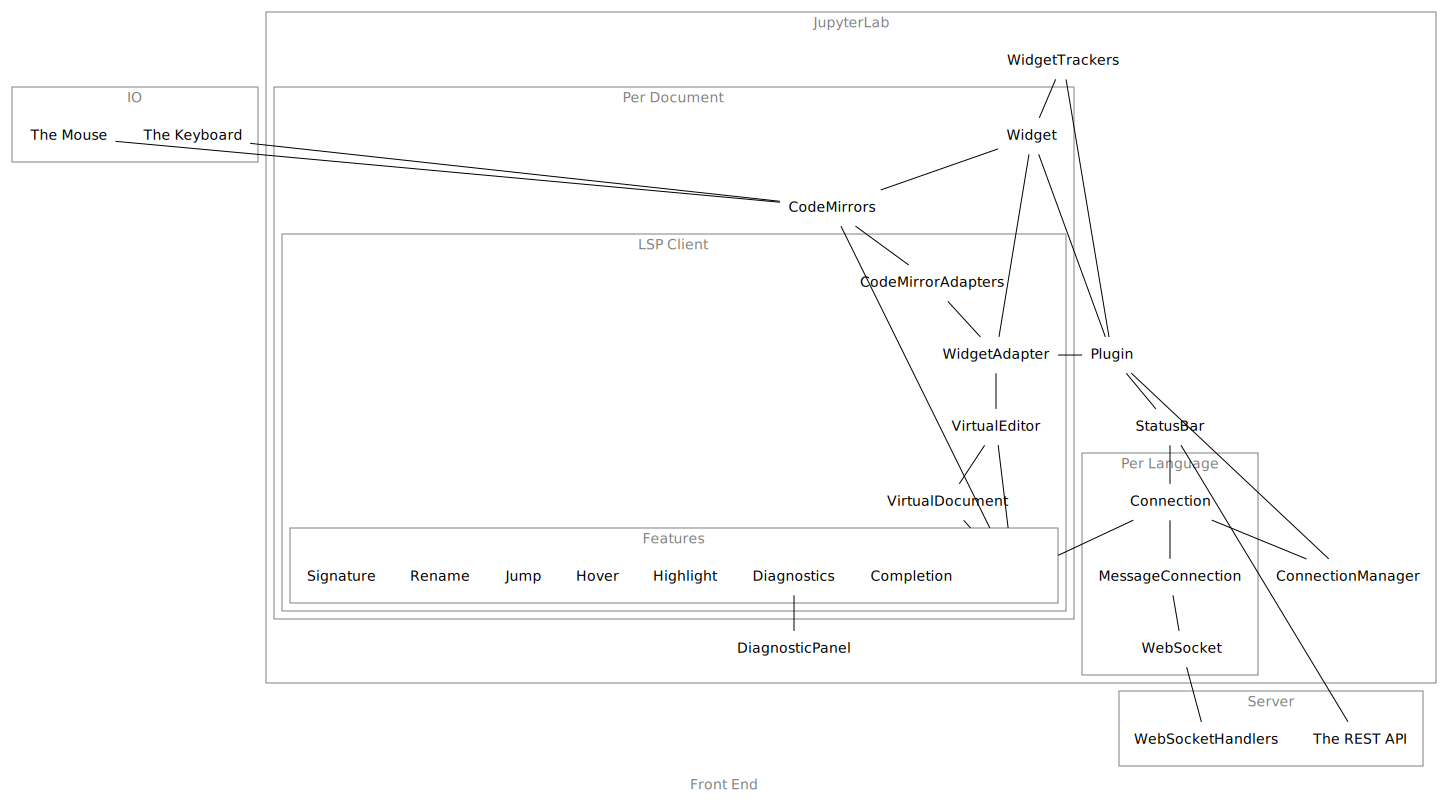

In [7]:
%dot dot/as-is/frontend.dot

#### Back End

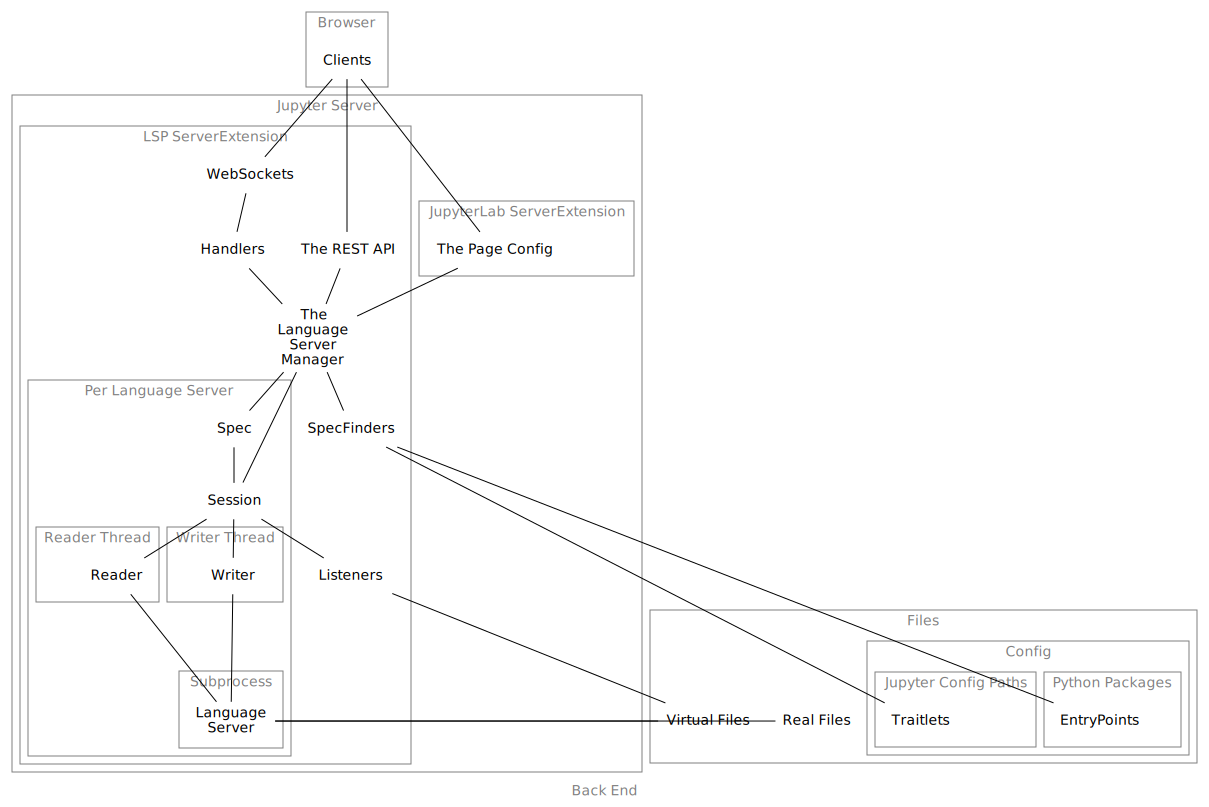

In [34]:
%dot dot/as-is/backend.dot

### Proposals

Some fragments of how the architecture could change in the future, and why (or
why not) they might be a good idea.

#### Reorganize client source with lerna and typescript projects [#76][]

> TBD

[#76]: https://github.com/krassowski/jupyterlab-lsp/issues/76

#### Add DiagnosticsManager, refactor DiagnosticPanel [#176][]

> TBD

[#176]: https://github.com/krassowski/jupyterlab-lsp/issues/176

#### Multiple sources of LSP messages on frontend and backend [#184][]

> TBD

[#184]: https://github.com/krassowski/jupyterlab-lsp/issues/184

#### Use mime types from server spec for language detection [#190][]

> TBD

[#190]: https://github.com/krassowski/jupyterlab-lsp/issues/190

#### Formalize and extend language transclusion [#191][]

> TBD

[#191]: https://github.com/krassowski/jupyterlab-lsp/issues/191